<a href="https://colab.research.google.com/github/mjmousavi97/Computer-Vision/blob/main/projects/pro-001/src/Linear_NN_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

Class_name = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

In [ ]:
def read_and_decode(filename, resize_dims):
    # Read the raw file
    img_bytes = tf.io.read_file(filename=filename)
    # Decode image data
    img = tf.image.decode_jpeg(img_bytes, channels=IMG_CHANNELS)
    # Convert pixel value to float in [0, 1]
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image
    img = tf.image.resize(img, resize_dims)

    return img

In [ ]:
def parse_csvline(csv_line):
    # record_default specify the data types for each columns
    record_default = ["", ""]
    filename, label_string = tf.io.decode_csv(csv_line, record_default)
    # load the image
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    # convert label string to integer
    label = tf.argmax(tf.math.equal(Class_name, label_string))

    return img, label

In [ ]:
train_dataset = (tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")).map(parse_csvline).batch(16)
eval_dataset = (tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")).map(parse_csvline).batch(16)

In [ ]:
for image_batch, label_batch in train_dataset.take(1):
    print(f"Image batch shape is: {image_batch.shape}")
    print(f"Label batch shape is: {label_batch.shape}")
    print(f"Label: {label_batch.numpy()}")

Image batch shape is: (16, 224, 224, 3)
Label batch shape is: (16,)
Label: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]


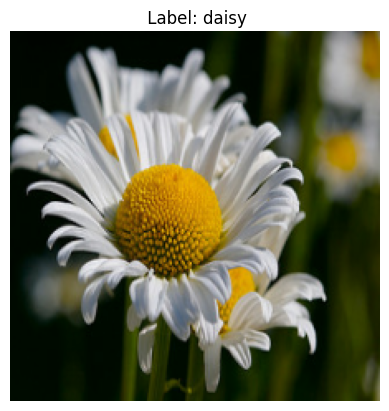

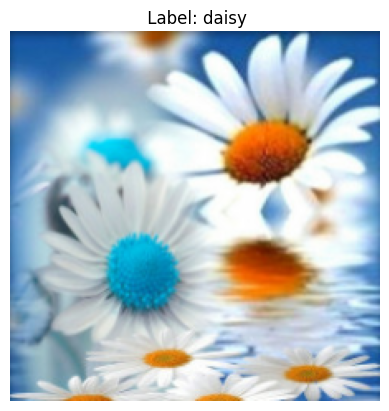

In [ ]:
for image_batch, label_batch in train_dataset.take(2):
    # take the first image abd label of second batch
    first_image = image_batch[0]
    first_label = label_batch[0]

    # show the image
    plt.imshow(first_image.numpy())
    plt.title(f" Label: {Class_name[first_label]}")
    plt.axis("off")
    plt.show()
